<a href="https://colab.research.google.com/github/quoctrung2005/TTNT/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

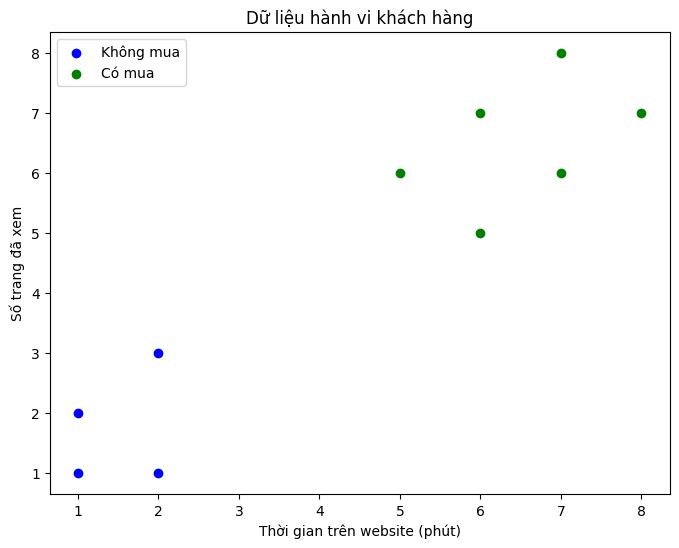


--- NHẬP THÔNG TIN KHÁCH HÀNG MỚI ---
Nhập thời gian trên website (phút): 2
Nhập số trang đã xem: 5
Nhập số láng giềng k: 2

--- KẾT QUẢ DỰ ĐOÁN ---
 DỰ ĐOÁN: KHÁCH HÀNG KHÔNG MUA HÀNG


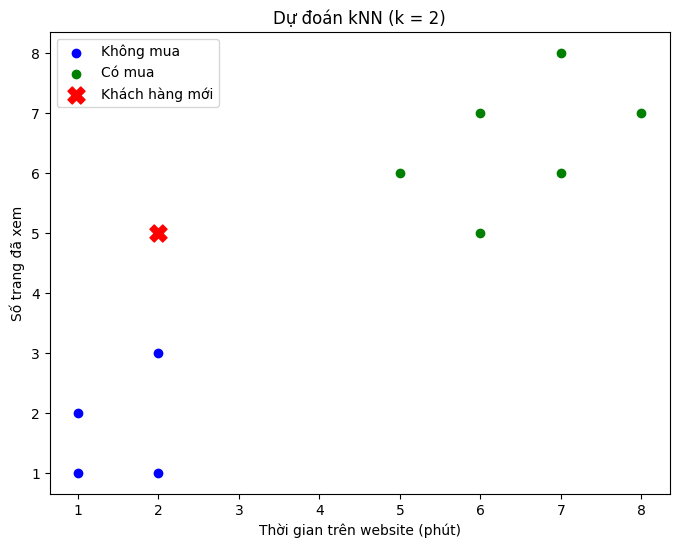

In [29]:
# ==========================================================
# BƯỚC 1: IMPORT THƯ VIỆN CƠ BẢN
# ==========================================================
# numpy: xử lý số học, mảng
# matplotlib: trực quan hóa dữ liệu

import numpy as np
import matplotlib.pyplot as plt


# ==========================================================
# BƯỚC 2: KHỞI TẠO DỮ LIỆU HUẤN LUYỆN (THỰC TẾ)
# ==========================================================
# Mỗi điểm dữ liệu gồm:
#   [Thời gian trên website (phút), Số trang đã xem]
# Nhãn:
#   0 -> Không mua hàng
#   1 -> Có mua hàng

X_train = np.array([
    [1, 2], [2, 1], [1, 1], [2, 3],     # Không mua
    [6, 7], [7, 6], [8, 7], [7, 8],     # Có mua
    [5, 6], [6, 5]
])

y_train = np.array([
    0, 0, 0, 0,
    1, 1, 1, 1,
    1, 1
])


# ==========================================================
# BƯỚC 3: TRỰC QUAN HÓA DỮ LIỆU HUẤN LUYỆN
# ==========================================================
# Giúp người dùng nhìn thấy sự phân bố của 2 nhóm khách hàng

plt.figure(figsize=(8, 6))

plt.scatter(X_train[y_train == 0][:, 0],
            X_train[y_train == 0][:, 1],
            c='blue', label='Không mua')

plt.scatter(X_train[y_train == 1][:, 0],
            X_train[y_train == 1][:, 1],
            c='green', label='Có mua')

plt.xlabel("Thời gian trên website (phút)")
plt.ylabel("Số trang đã xem")
plt.title("Dữ liệu hành vi khách hàng")
plt.legend()
plt.show()


# ==========================================================
# BƯỚC 4: HÀM TÍNH KHOẢNG CÁCH EUCLIDEAN
# ==========================================================
# Khoảng cách Euclidean = căn bậc hai của tổng bình phương hiệu

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))


# ==========================================================
# BƯỚC 5: CÀI ĐẶT THUẬT TOÁN kNN
# ==========================================================
# Với mỗi điểm cần dự đoán:
#   1. Tính khoảng cách đến tất cả điểm train
#   2. Sắp xếp theo khoảng cách tăng dần
#   3. Chọn k điểm gần nhất
#   4. Bỏ phiếu đa số để dự đoán nhãn

def knn_predict(X_train, y_train, X_test, k):
    predictions = []

    for x_test in X_test:
        distances = []

        # Tính khoảng cách tới từng điểm trong tập train
        for i in range(len(X_train)):
            dist = euclidean_distance(x_test, X_train[i])
            distances.append((dist, y_train[i]))

        # Sắp xếp các điểm theo khoảng cách
        distances.sort(key=lambda x: x[0])

        # Lấy k láng giềng gần nhất
        k_nearest = distances[:k]

        # Đếm số phiếu của mỗi lớp
        votes = {}
        for _, label in k_nearest:
            votes[label] = votes.get(label, 0) + 1

        # Chọn lớp có nhiều phiếu nhất
        predicted_label = max(votes, key=votes.get)
        predictions.append(predicted_label)

    return np.array(predictions)


# ==========================================================
# BƯỚC 6: NGƯỜI DÙNG NHẬP DỮ LIỆU KHÁCH HÀNG MỚI
# ==========================================================
# Cho phép nhập trực tiếp từ bàn phím để demo

print("\n--- NHẬP THÔNG TIN KHÁCH HÀNG MỚI ---")

time_on_site = float(input("Nhập thời gian trên website (phút): "))
pages_viewed = int(input("Nhập số trang đã xem: "))
k = int(input("Nhập số láng giềng k: "))

X_new = np.array([[time_on_site, pages_viewed]])


# ==========================================================
# BƯỚC 7: DỰ ĐOÁN KẾT QUẢ
# ==========================================================

prediction = knn_predict(X_train, y_train, X_new, k)

print("\n--- KẾT QUẢ DỰ ĐOÁN ---")
if prediction[0] == 1:
    print(" DỰ ĐOÁN: KHÁCH HÀNG CÓ KHẢ NĂNG MUA HÀNG")
else:
    print(" DỰ ĐOÁN: KHÁCH HÀNG KHÔNG MUA HÀNG")


# ==========================================================
# BƯỚC 8: TRỰC QUAN HÓA KẾT QUẢ DỰ ĐOÁN
# ==========================================================
# Vẽ thêm điểm khách hàng mới để dễ quan sát

plt.figure(figsize=(8, 6))

plt.scatter(X_train[y_train == 0][:, 0],
            X_train[y_train == 0][:, 1],
            c='blue', label='Không mua')

plt.scatter(X_train[y_train == 1][:, 0],
            X_train[y_train == 1][:, 1],
            c='green', label='Có mua')

plt.scatter(X_new[:, 0], X_new[:, 1],
            c='red', marker='X', s=150, label='Khách hàng mới')

plt.xlabel("Thời gian trên website (phút)")
plt.ylabel("Số trang đã xem")
plt.title(f"Dự đoán kNN (k = {k})")
plt.legend()
plt.show()

